<a href="https://colab.research.google.com/github/ayushabhinav/CountryDataCluster/blob/main/CountryDataCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/drive')

Mounted at /drive


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import  linkage, dendrogram, cut_tree

In [ ]:
data_file = '/drive/MyDrive/KMeans/Country-data.csv'

### Read and describe data

In [ ]:
# read the data file.
df = pd.read_csv(data_file)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# describe data
df.describe()
# most columns have outlier as their 75%ile and max has huge difference.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# data info
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- There is no column with null value in it.

### Look for outliers

##### GDPP Column

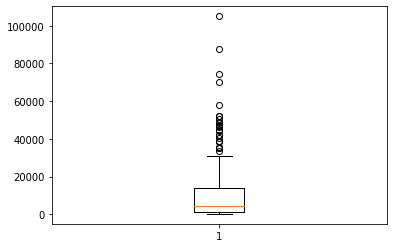

In [ ]:
# outliers in gdpp
plt.boxplot(df['gdpp'])
plt.show()

In [ ]:
# list donwn countries which are above upper whisker
q1, q3 = np.quantile(df.gdpp, [.25 , .75])
q1, q3

(1330.0, 14050.0)

In [ ]:
upper_limit = 1.5 * (q3 - q1) + q3
upper_limit

33130.0

In [ ]:
gdpp_outlier = (df.gdpp > upper_limit)
df[gdpp_outlier]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900


Above countries are high income countries.

##### Other Columns

plotting histogram for all variables

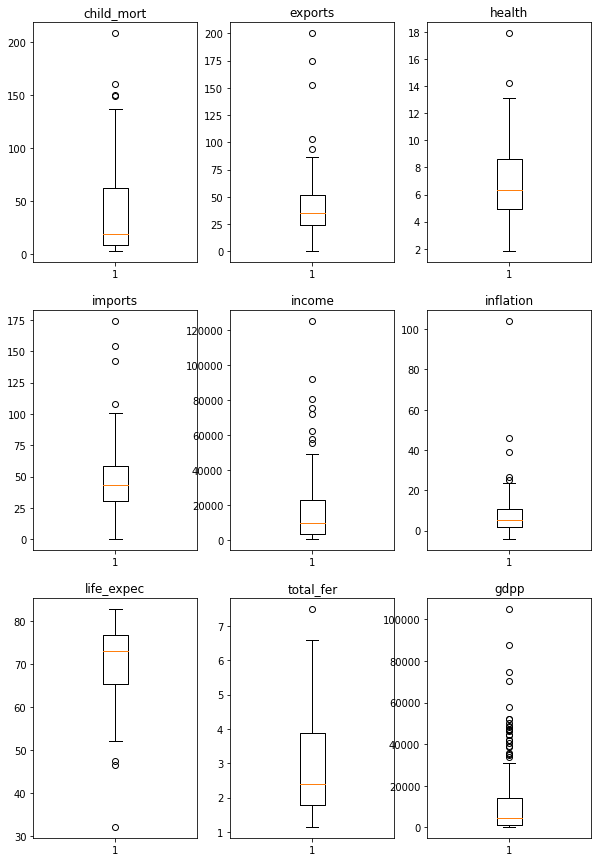

In [ ]:
col_names = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=[10,15])
for i, col_name in enumerate(col_names):
  plt.subplot(3, 3, i + 1)
  plt.boxplot(df[col_name])
  plt.title(col_name)
plt.show()

- gdpp has many count of outliers.
- Rest Columns also have outliers in nominal count.

### Find correllation between columns

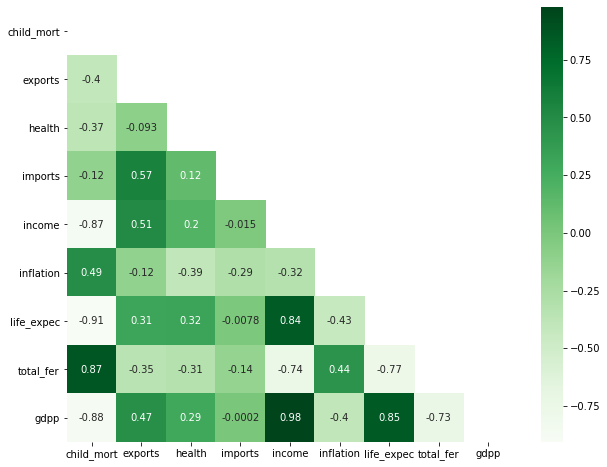

In [ ]:
corr_mat = df.drop(columns=['country']).corr(method='spearman')
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=[10,8])
sns.heatmap(corr_mat, mask=mask, cmap='Greens', annot=True)

- Following pair has high correlation.
  - (+)ve correlation
      - gdpp & income
      - gdpp & life_expec
      - life expec & income
      - child_mort & total_fer
      - import & export
  - (-)ve correlation
      - life_expec & child_mort
      - life_expec & total_fer
      - gdpp & child_mort
      - total_fer & income
      - child_mort & income


### Data Preparation
    - Choose Data
    - Scaling Data

In [ ]:
cluster_cols = ['child_mort','health', 'income', 'life_expec', 'gdpp']
df_cluster = df[cluster_cols]
df_cluster.head()

,child_mort,health,income,life_expec,gdpp
0,90.2,7.58,1610,56.2,553
1,16.6,6.55,9930,76.3,4090
2,27.3,4.17,12900,76.5,4460
3,119.0,2.85,5900,60.1,3530
4,10.3,6.03,19100,76.8,12200


In [ ]:
scalar = StandardScaler()
df_cluster_scaled = pd.DataFrame(scalar.fit_transform(df_cluster))
df_cluster_scaled.columns = df_cluster.columns
df_cluster_scaled

,child_mort,health,income,life_expec,gdpp
0,1.291532,0.279088,-0.808245,-1.619092,-0.679180
1,-0.538949,-0.097016,-0.375369,0.647866,-0.485623
2,-0.272833,-0.966073,-0.220844,0.670423,-0.465376
3,2.007808,-1.448071,-0.585043,-1.179234,-0.516268
4,-0.695634,-0.286894,0.101732,0.704258,-0.041817
...,...,...,...,...,...
162,-0.225578,-0.571711,-0.738527,-0.852161,-0.546913
163,-0.526514,-0.695862,-0.033542,0.546361,0.029323
164,-0.372315,0.008877,-0.658404,0.286958,-0.637754
165,0.448417,-0.597272,-0.658924,-0.344633,-0.637754


### Check optimal number of cluster statistically

In [ ]:
n_inertia = []
for n_cluster in range(2,10):
  kmeans = KMeans(n_clusters=n_cluster, max_iter=50, random_state=50)
  kmeans.fit(df_cluster_scaled)
  n_inertia.append(kmeans.inertia_)


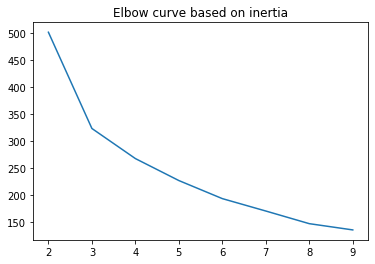

In [ ]:
plt.plot(n_inertia)
plt.xticks(ticks=range(0,8), labels=range(2,10))
plt.title('Elbow curve based on inertia')
plt.show()

In [ ]:
n_silhoutte = []
for n_cluster in range(2,10):
  kmeans = KMeans(n_clusters=n_cluster, max_iter=50, random_state=50)
  kmeans.fit(df_cluster_scaled)
  n_silhoutte.append(silhouette_score(df_cluster_scaled, labels=kmeans.labels_))

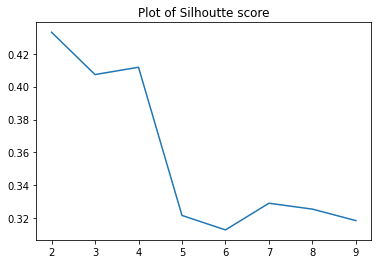

In [ ]:
plt.plot(n_silhoutte)
plt.xticks(ticks=range(0,8), labels=range(2,10))
plt.title('Plot of Silhoutte score')
plt.show()

- We can choose between 3 and 4 as per business fitment. cluster size 2 and >4 doesnot look appealing

### Run Kmeans with 3 and 4 clusters

##### for 3 cluster

In [ ]:
kmeans_3 = KMeans(n_clusters=3, max_iter=50)
kmeans_3.fit(df_cluster_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_cluster_3 = pd.concat([df, pd.DataFrame(kmeans_3.labels_, columns=['Cluster'])], axis=1)
df_cluster_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


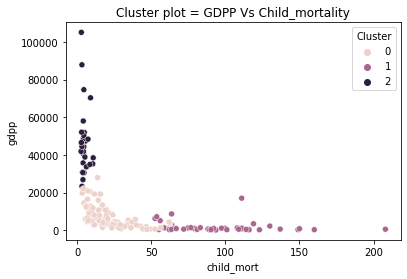

In [ ]:
## visualizing Cluster
sns.scatterplot(data=df_cluster_3, y='gdpp', x='child_mort', hue='Cluster')
plt.title("Cluster plot = GDPP Vs Child_mortality")
plt.show()

##### for 4 cluster

In [ ]:
kmeans_4 = KMeans(n_clusters=4, max_iter=50)
kmeans_4.fit(df_cluster_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_cluster_4 = pd.concat([df, pd.DataFrame(kmeans_4.labels_, columns=['Cluster'])], axis=1)
df_cluster_4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


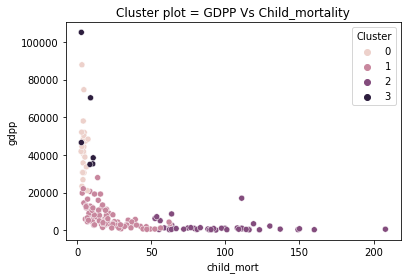

In [ ]:
## visualizing Cluster
sns.scatterplot(data=df_cluster_4, y='gdpp', x='child_mort', hue='Cluster')
plt.title("Cluster plot = GDPP Vs Child_mortality")
plt.show()

### Analyze data on basis of clusters

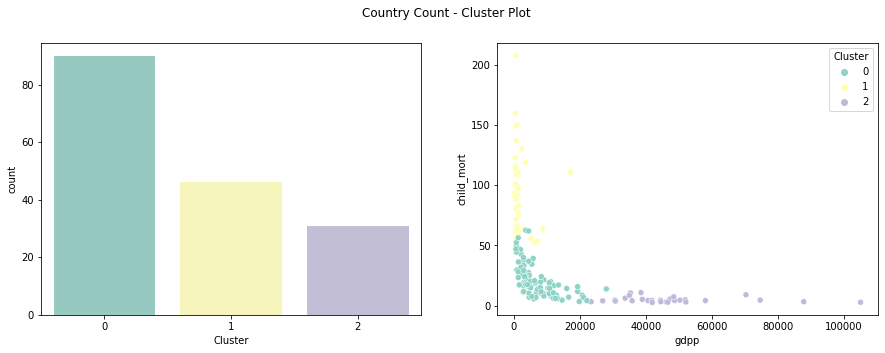

In [ ]:
# For n_cluster = 3 
fig, ax =plt.subplots(1,2, figsize=[15,5])
sns.countplot(data=df_cluster_3, x='Cluster', ax=ax[0], palette="Set3")
sns.scatterplot(data=df_cluster_3, x='gdpp', y='child_mort', hue='Cluster', ax=ax[1], palette="Set3" )
plt.suptitle('Country Count - Cluster Plot')
plt.show()

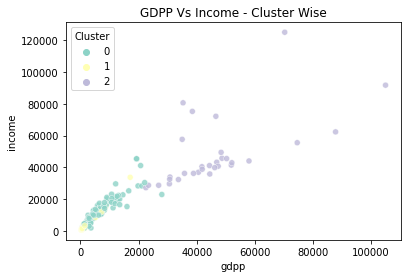

In [ ]:
sns.scatterplot(data=df_cluster_3, x='gdpp', y='income', hue='Cluster', palette="Set3", alpha=0.8)
plt.title('GDPP Vs Income - Cluster Wise')
plt.show()

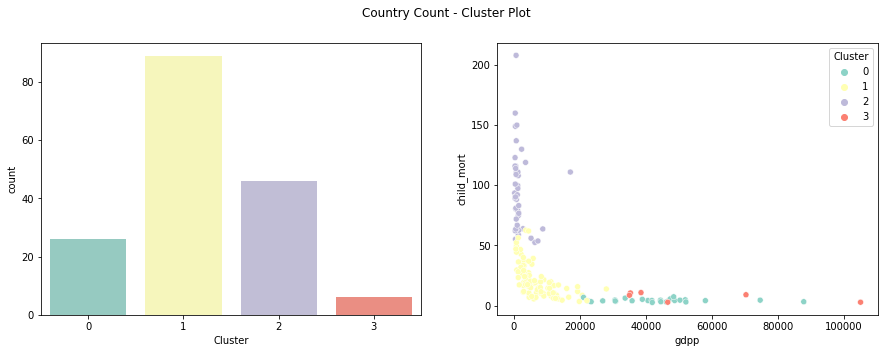

In [ ]:
# For n_cluster = 4 
fig, ax =plt.subplots(1,2, figsize=[15,5])
sns.countplot(data=df_cluster_4, x='Cluster', ax=ax[0], palette="Set3")
sns.scatterplot(data=df_cluster_4, x='gdpp', y='child_mort', hue='Cluster', ax=ax[1] , palette="Set3")
plt.suptitle('Country Count - Cluster Plot')
plt.show()

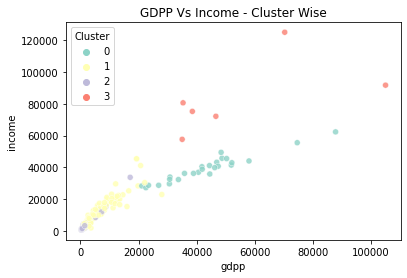

In [ ]:
sns.scatterplot(data=df_cluster_4, x='gdpp', y='income', hue='Cluster', palette="Set3", alpha=0.8)
plt.title('GDPP Vs Income - Cluster Wise')
plt.show()

In [ ]:
print(f'Low GDPP and High Child Mortality Rate (n_cluster: 3) {df_cluster_3[df_cluster_3.Cluster == 1].shape}')
print(f'Low GDPP and High Child Mortality Rate (n_cluster: 4) {df_cluster_4[df_cluster_4.Cluster == 2].shape}')

Low GDPP and High Child Mortality Rate (n_cluster: 3) (46, 11)
Low GDPP and High Child Mortality Rate (n_cluster: 4) (46, 11)


##### Both clustter give use the same infomrmation for country which have low gdpp and high mortality rate.

In [ ]:
# list of country that need to be focued
df_cluster_3[df_cluster_3.Cluster == 1]['country'].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

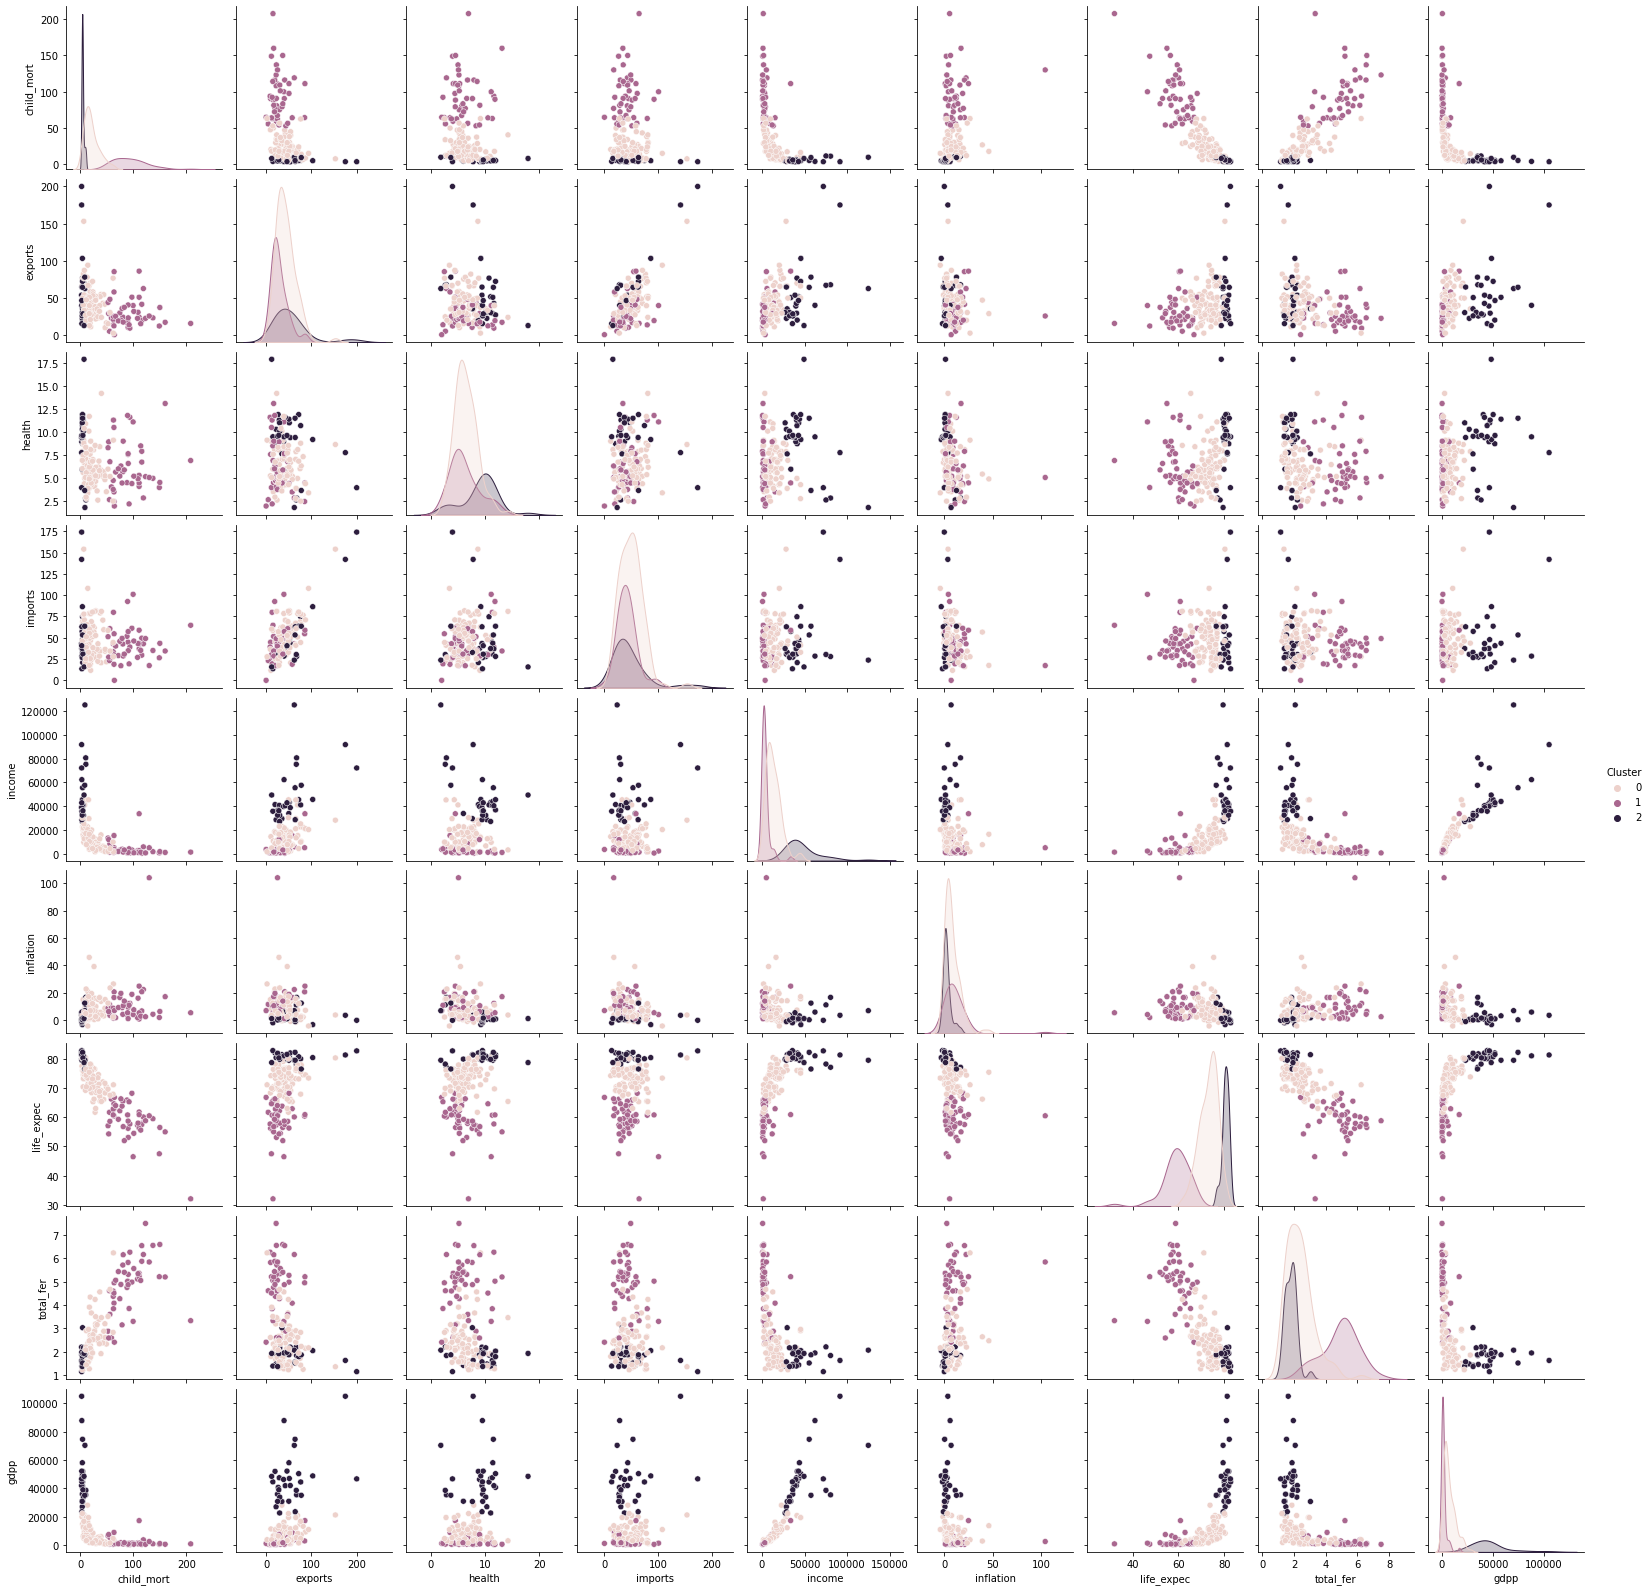

In [ ]:
sns.pairplot(df_cluster_3, hue='Cluster')

######  We need to focus on above listed countries because of following reasons:-
   - Low GDPP
   - High Child Mortality Rate
   - High Total Fertility Rate
   - Lower Life Expectancy
   - Lower Income
   - Lower Health Expenditure

###  Find cluster using Hierarical Clusturing

##### Single Linkage

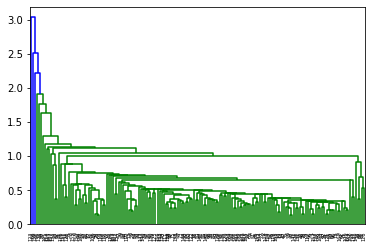

In [ ]:
links = linkage(df_cluster_scaled, method='single')
dendrogram(links)
plt.show()

In [ ]:
df_cluster_hier_single = pd.concat([df,pd.DataFrame(cut_tree(links, n_clusters=3).reshape(-1,), columns=['Cluster'])], axis=1)
df_cluster_hier_single.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


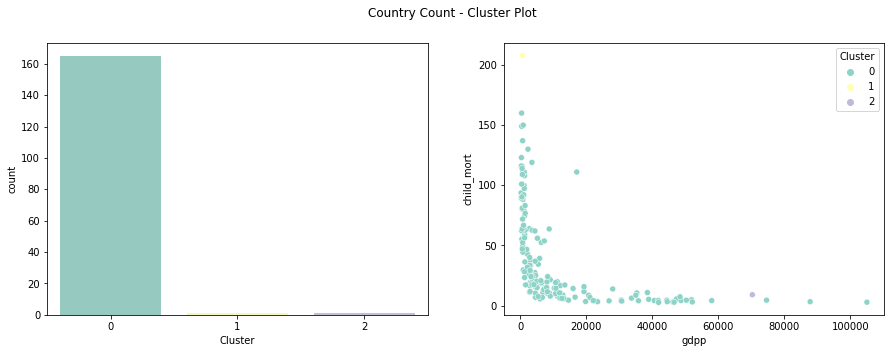

In [ ]:
fig, ax =plt.subplots(1,2, figsize=[15,5])
sns.countplot(data=df_cluster_hier_single, x='Cluster', ax=ax[0], palette="Set3")
sns.scatterplot(data=df_cluster_hier_single, x='gdpp', y='child_mort', hue='Cluster', ax=ax[1], palette="Set3" )
plt.suptitle('Country Count - Cluster Plot')
plt.show()

- Single linkage  doesnot give the correct result as most of the countries are placed in one cluster.

##### Complete Linkage

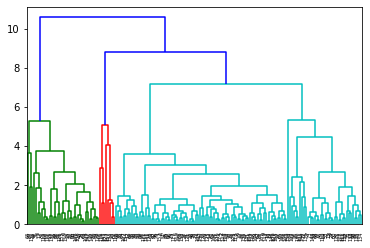

In [ ]:
links = linkage(df_cluster_scaled, method='complete')
dendrogram(links)
plt.show()

In [ ]:
df_cluster_hier_complete = pd.concat([df,pd.DataFrame(cut_tree(links, n_clusters=3).reshape(-1,), columns=['Cluster'])], axis=1)
df_cluster_hier_complete.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


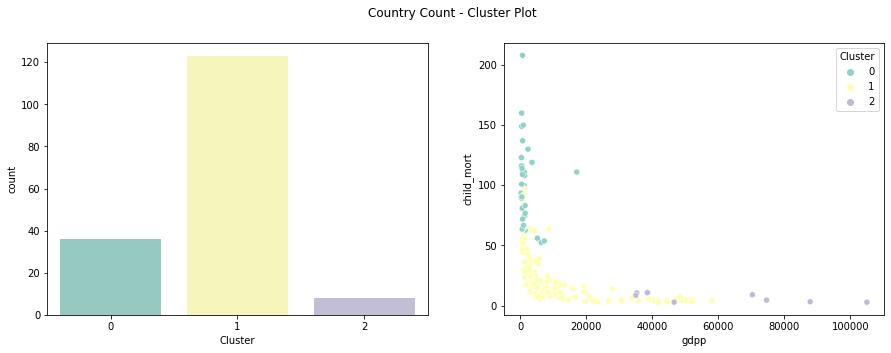

In [ ]:
fig, ax =plt.subplots(1,2, figsize=[15,5])
sns.countplot(data=df_cluster_hier_complete, x='Cluster', ax=ax[0], palette="Set3")
sns.scatterplot(data=df_cluster_hier_complete, x='gdpp', y='child_mort', hue='Cluster', ax=ax[1], palette="Set3" )
plt.suptitle('Country Count - Cluster Plot')
plt.show()

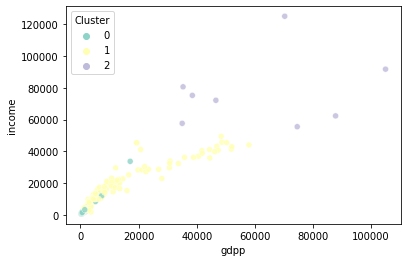

In [ ]:
sns.scatterplot(data=df_cluster_hier_complete, x='gdpp', y='income', hue='Cluster', palette="Set3", alpha=0.8)
plt.show()

- Cluster0 has low GDPP and low income. They are in dire need of help.

In [ ]:
df_cluster_hier_complete[df_cluster_hier_complete.Cluster == 0]['country'].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati',
       'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

### Conclusion

List of countries on which money should be spent are:- 
  - Afghanistan, 
  - Angola, 
  - Benin, 
  - Botswana, 
  - Burkina Faso,
  - Burundi,
  - Cameroon, 
  - Central African Republic, 
  - Chad,
  - Congo, Dem. Rep., 
  - Cote d'Ivoire, 
  - Equatorial Guinea, 
  - Gambia,
  - Ghana, 
  - Guinea, 
  - Guinea-Bissau, 
  - Haiti, 
  - Kenya, 
  - Kiribati,
  - Lesotho, 
  - Liberia, 
  - Malawi, 
  - Mali, 
  - Mozambique, 
  - Namibia,
  - Niger, 
  - Nigeria, 
  - Rwanda, 
  - Senegal, 
  - Sierra Leone,
  - South Africa, 
  - Sudan, 
  - Tanzania, 
  - Togo, 
  - Uganda, 
  - Zambia

Reason for Expenditure :- 
   - Low GDPP
   - High Child Mortality Rate
   - High Total Fertility Rate
   - Lower Life Expectancy
   - Lower Income
   - Lower Health Expenditure